In [1]:
import math
import numpy as np
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe
import openrtdynamics2.targets as tg

from helper_fn import * 

In [2]:
system = dy.enter_system()

# the diagram
U = dy.float64(2.0)

with dy.sub_statemachine( "statemachine1" ) as switch:

    with switch.new_subsystem('state_A') as system:

        x = dy.float64(0.0)
        v = dy.float64(0.0)

        counter = dy.counter()
        timeout = ( counter > 10 )
        next_state = dy.conditional_overwrite(signal=dy.int32(-1), condition=timeout, new_value=1 ).set_name('next_state')

        system.set_switched_outputs([ x, v, counter ], next_state)


    with switch.new_subsystem('state_B') as system:

        x = dy.signal()
        v = dy.signal()

        acc = dy.add( [ U, v, x ], [ 1, -0.1, -0.1 ] )

        v << dy.euler_integrator( acc, Ts=0.1, initial_state=-1.0 )
        x << dy.euler_integrator( v,   Ts=0.1 )

        counter = dy.counter()
        next_state = dy.conditional_overwrite(signal=dy.int32(-1), condition=counter > 50, new_value=0 ).set_name('next_state')

        system.set_switched_outputs([ x, v, counter ], next_state)


output_x = switch.outputs[0].set_name("ox")
output_v = switch.outputs[1].set_name("ov")
counter = switch.outputs[2].set_name("counter")
state = switch.state.set_name('state_control')

# define output(s)
dy.append_output(output_x, 'output_x')
dy.append_output(output_v, 'output_v')
dy.append_output(counter, 'counter')
dy.append_output(state, 'state')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#
dy.clear()

compiling system Sys1000_state_A (level 1)... 
compiling system Sys1001_state_B (level 1)... 
compiling system simulation (level 0)... 


In [3]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=100)

In [4]:
# NBVAL_CHECK_OUTPUT
sim_results['output_x']

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.1       , -0.179     ,
       -0.23711   , -0.2744599 , -0.29119919, -0.28749663, -0.26353989,
       -0.21953523, -0.15570707, -0.07229766,  0.03043336,  0.15220938,
        0.2927372 ,  0.45170753,  0.62879542,  0.82366072,  1.03594858,
        1.26528989,  1.51130185,  1.77358839,  2.05174077,  2.34533803,
        2.65394759,  2.97712571,  3.3144181 ,  3.66536044,  4.02947893,
        4.40629089,  4.79530524,  5.19602316,  5.6079386 ,  6.03053886,
        6.46330517,  6.90571329,  7.35723402,  7.81733383,  8.2854754 ,
        8.76111823,  9.24371915,  9.73273295, 10.22761289, 10.72781129,
       11.2327801 , 11.74197141, 12.25483803, 12.77083401, 13.28941519,
       13.81003972, 14.3321686 , 14.85526614, 15.37880055,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [5]:
# NBVAL_CHECK_OUTPUT
sim_results['counter']

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  0.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [6]:
# assert_equal( sim_results['cnt'] , [ ] )

In [7]:
import numpy as np
import matplotlib.pyplot as plt

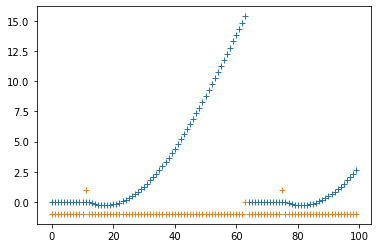

In [8]:
plt.figure()
plt.plot( sim_results['output_x'], '+'  )
plt.plot( sim_results['state'], '+'  )
# plt.plot( sim_results['counter'], '+'  )
plt.show()

# Three states with timeouts

In [9]:
dy.clear()
system = dy.enter_system()

# the diagram
U = dy.float64(2.0)

with dy.sub_statemachine( "statemachine1" ) as switch:

    with switch.new_subsystem('state_A') as system:

        timeout = ( dy.counter() >= 2-1 )
        next_state = dy.conditional_overwrite(signal=dy.int32(-1), condition=timeout, new_value=1 ).set_name('next_state')

        system.set_switched_outputs([ dy.int32(1.0) ], next_state)

        
    with switch.new_subsystem('state_B') as system:

        timeout = ( dy.counter() >= 4-1 )
        next_state = dy.conditional_overwrite(signal=dy.int32(-1), condition=timeout, new_value=2 ).set_name('next_state')

        system.set_switched_outputs([ dy.int32(2.0) ], next_state)

        
    with switch.new_subsystem('state_C') as system:

        timeout = ( dy.counter() >= 6-1 )
        next_state = dy.conditional_overwrite(signal=dy.int32(-1), condition=timeout, new_value=0 ).set_name('next_state')

        system.set_switched_outputs([ dy.int32(3.0) ], next_state)



y = switch.outputs[0].set_name("y")

# define output(s)
dy.append_output(y, 'y')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

compiling system Sys1000_state_A (level 1)... 
compiling system Sys1001_state_B (level 1)... 
compiling system Sys1002_state_C (level 1)... 
compiling system simulation (level 0)... 


In [10]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=25)

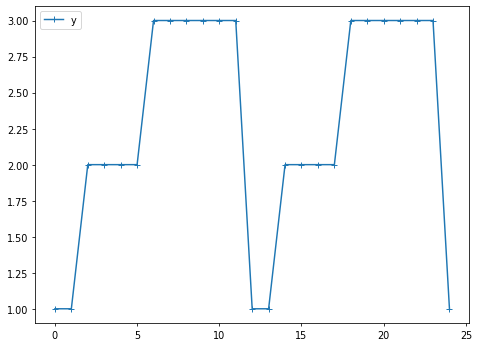

In [11]:
plt.figure(figsize=(8,6), dpi=70)
plt.plot( sim_results['y'], '+-' )

plt.legend(['y'])
plt.show()

In [12]:
sim_results['y']

array([1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 1., 1., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 1.])

In [13]:
assert_equal( sim_results['y'] , [1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 1., 1., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 1.])

# Immediate state switches

In [14]:
dy.clear()
system = dy.enter_system()

decision_input = dy.signal_step(7)

#
# Please note that the parameter immediate_state_switch=True is set.
# This changes the way how state transitions are timed.
# It is possible to step through multiple states within one time instant.
#

with dy.sub_statemachine( "statemachine", immediate_state_switch=True ) as switch:

    with switch.new_subsystem('start') as system:

        next_state = dy.conditional_overwrite(dy.int32(-1), dy.counter() >= 2, 1 )
        system.set_switched_outputs([ dy.int32(0) ], next_state)

    with switch.new_subsystem('decision') as system:
        #
        # After leaving state 'start', the conditions in This state are evaluated.
        # The state machine immediately transitions into state A ot B depending on
        # the result. The total transition 'start' -> 'decision' -> 'A' / 'B'
        # happens from one time instant to the next (c.f. the timeing diagram below).
        #
        # Furher, the states of the blocks inside 'decision' are not updated as this.
        # state is immediately left.
        #

        next_state = dy.conditional_overwrite(dy.int32(-1), decision_input < 0.5, 2 )
        next_state = dy.conditional_overwrite(next_state,   decision_input > 0.5, 3 )
        system.set_switched_outputs([ dy.int32(1) ], next_state)

        
    with switch.new_subsystem('A') as system:

        next_state = dy.conditional_overwrite(dy.int32(-1), dy.counter() >= 6, 0 )
        system.set_switched_outputs([ dy.int32(2) ], next_state)

    with switch.new_subsystem('B') as system:

        next_state = dy.conditional_overwrite(dy.int32(-1), dy.counter() >= 6, 0 )
        system.set_switched_outputs([ dy.int32(3) ], next_state)


active_state = switch.outputs[0].set_name("active_state")


# define output(s)
dy.append_output(active_state,   'active_state')
dy.append_output(decision_input, 'decision_input')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

compiling system Sys1000_start (level 1)... 
compiling system Sys1001_decision (level 1)... 
compiling system Sys1002_A (level 1)... 
compiling system Sys1003_B (level 1)... 
compiling system simulation (level 0)... 


In [15]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=20)

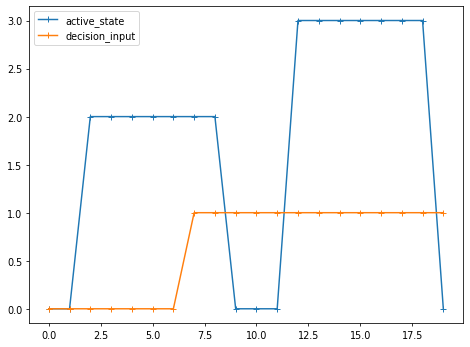

In [16]:
plt.figure(figsize=(8,6), dpi=70)
plt.plot( sim_results['active_state'], '+-' )
plt.plot( sim_results['decision_input'], '+-' )

plt.legend(['active_state', 'decision_input'])
plt.show()

In [17]:
sim_results['active_state']

array([0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 3., 3., 3., 3., 3.,
       3., 3., 0.])

In [18]:
assert_equal( sim_results['active_state'] , [0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 3., 3., 3., 3., 3.,
       3., 3., 0.] )

In [19]:
sim_results['decision_input']

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [20]:
assert_equal( sim_results['decision_input'] , [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.] )